In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing two datasets
frog_data1 = pd.read_excel('all_frog_data.xlsx')
frog_data1.head()

C:\Users\Vault\AppData\Local\Temp/ipykernel_6924/1479429817.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  frog_data1 = pd.read_excel('all_frog_data.xlsx')


,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax


In [3]:
frog_data2 = pd.read_excel('All_MLOut_new.xlsx')
frog_data2.head()

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668


In [4]:
#checking the number of rows and columns of frog_data1
frog_data1.shape


(193791, 9)

In [5]:
#checking the number of rows and columns of frog_data2
frog_data2.shape

(193791, 13)

Since frog_data1 and frog_data2 have a number of same column names and values in their dataset as shown above
traingulation of any of the dataset is neccessary to avoid duplication of some columns and its values.


In [6]:
#calling up frogdata_data2 columns and removing common columns
frog_data2.columns

Index(['Unnamed: 0', 'gbifID', 'country', 'continent', 'decimalLatitude',
       'decimalLongitude', 'species', 'occurrenceStatus', 'key', 'ppt_mean',
       'soil_mean', 'tmax_mean', 'tmin_mean'],
      dtype='object')

In [7]:
new_frog2 = frog_data2[['gbifID', 'occurrenceStatus', 'key', 'ppt_mean','soil_mean', 'tmax_mean', 'tmin_mean']]
new_frog2

,gbifID,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...
193786,1322002619,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,0,193789,190.06667,141.43333,29.326668,23.588335


In [8]:
#merging frog_data1 to new_frog2
final_frog = frog_data1.merge(new_frog2, on = 'gbifID', how = 'inner')
final_frog

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [9]:
final_frog = final_frog.drop('Unnamed: 0', axis = 1)

In [10]:
#checking null values in the data set
final_frog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193791 non-null  int64         
 1   eventDate         185026 non-null  datetime64[ns]
 2   country           193791 non-null  object        
 3   continent         193791 non-null  object        
 4   stateProvince     193099 non-null  object        
 5   decimalLatitude   193791 non-null  float64       
 6   decimalLongitude  193791 non-null  float64       
 7   species           193791 non-null  object        
 8   occurrenceStatus  193791 non-null  int64         
 9   key               193791 non-null  int64         
 10  ppt_mean          161812 non-null  float64       
 11  soil_mean         161812 non-null  float64       
 12  tmax_mean         161812 non-null  float64       
 13  tmin_mean         161812 non-null  float64       
dtypes: d

It is observed evendate, stateProvince, ppt_mean, soil_mean, tmax_mean, tmin_mean have null values in them as their count 
is not up to  193791

### Univariate Analysis

#### gbifid

In [11]:
final_frog.gbifID.value_counts()

2574007008    1
3108890958    1
1915628360    1
3108866967    1
1070559035    1
             ..
3463553930    1
3463553931    1
3463553932    1
3463553933    1
1320529451    1
Name: gbifID, Length: 193791, dtype: int64

#### eventDate

In [12]:
final_frog.eventDate.value_counts()

2010-12-17 00:00:00    1712
2010-11-01 00:00:00     894
2010-12-18 00:00:00     800
2010-12-01 00:00:00     756
2010-11-05 00:00:00     669
                       ... 
2021-04-09 20:36:52       1
2017-01-13 11:25:00       1
2020-01-17 10:46:30       1
2018-02-11 03:31:00       1
1924-03-28 00:00:00       1
Name: eventDate, Length: 18147, dtype: int64

In [13]:
final_frog.eventDate.max()

Timestamp('2022-02-10 14:32:00')

 shows the data on the latest date recorded

In [14]:
final_frog.eventDate.min()

Timestamp('1754-03-01 00:00:00')

shows the data of the furthest date recorded

In [15]:
# first 11 counts shows the dates of most recorded data.
final_frog.eventDate.value_counts()[:11]

2010-12-17    1712
2010-11-01     894
2010-12-18     800
2010-12-01     756
2010-11-05     669
2020-11-06     663
2020-11-09     633
2020-11-08     609
2020-11-07     586
1977-02-01     466
2020-10-03     456
Name: eventDate, dtype: int64

it is observed that most recording were made in 2010 and in 2020 
 it is also observed that in a further  date thus in, 1977 many data were recorded

In [16]:
final_frog[final_frog['eventDate'] == '1977-02-01']['species'].value_counts()

Crinia Signifera    466
Name: species, dtype: int64

In [17]:
final_frog[final_frog['eventDate'] == '1977-02-01']['stateProvince'].value_counts()

Victoria    466
Name: stateProvince, dtype: int64

in 1977-02-01 ,Victoria state province during summer recorded 466 'Crinia Signifera' species which made up one of the most recorded dates(thus 10th position) in the total data set.


In [18]:
final_frog[final_frog['species'] == 'Crinia Signifera'][:20]

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
16,3302372112,2021-05-05 10:56:00,Australia,Australia,South Australia,-35.208964,138.480985,Crinia Signifera,0,16,35.983334,9.466666,21.575000,11.818336
24,3314568431,2021-06-19 12:00:38,Australia,Australia,Tasmania,-43.232435,147.257886,Crinia Signifera,0,24,48.816666,22.150000,16.625002,8.688335
36,3384069347,2021-09-04 18:21:48,Australia,Australia,New South Wales,-32.959908,151.723892,Crinia Signifera,0,36,72.133330,61.533333,23.651667,12.553335
38,1668795331,2013-01-29 18:45:56,Australia,Australia,New South Wales,-33.704260,151.180372,Crinia Signifera,0,38,67.650000,43.233334,24.130001,12.366668
43,2465173866,2019-11-22 14:03:00,Australia,Australia,Tasmania,-41.011667,144.618333,Crinia Signifera,0,43,NaN,NaN,NaN,NaN
44,3384342230,2021-09-04 18:13:40,Australia,Australia,New South Wales,-34.239187,150.915847,Crinia Signifera,0,44,107.950000,105.150000,21.861671,11.503335
49,3314472785,2021-06-19 18:18:44,Australia,Australia,South Australia,-34.803865,138.604876,Crinia Signifera,0,49,35.233334,9.950000,22.295000,11.506667
55,1100528051,1965-03-07 00:00:00,Australia,Australia,New South Wales,-35.283880,148.813050,Crinia Signifera,0,55,82.816666,69.066666,17.208336,4.326667
56,1100533029,1980-10-25 00:00:00,Australia,Australia,New South Wales,-36.573880,149.930270,Crinia Signifera,0,56,61.083332,32.583332,20.611668,9.098334
57,1100522507,NaT,Australia,Australia,New South Wales,-34.600000,150.533000,Crinia Signifera,0,57,65.683334,71.733330,20.090002,8.045002


In [19]:
#finding the months of the eventdates
final_frog['month'] = final_frog.eventDate.dt.month

In [20]:
final_frog.month.value_counts()

9.0     29708
11.0    26217
10.0    25442
12.0    16408
8.0     15368
2.0     12766
7.0     11960
1.0     11600
6.0      9809
3.0      8878
5.0      8826
4.0      8044
Name: month, dtype: int64

from above,it is observed the months of September, November, October had the most value recording which were during the Spring 
and in december during the summer

In [21]:
#showing distribution with the month
final_frog

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336,1.0
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668,3.0
2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004,4.0
3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670,7.0
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667,NaN
193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667,4.0
193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667,4.0
193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335,7.0


In [22]:
final_frog['year'] = final_frog.eventDate.dt.year
final_frog

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336,1.0,2020.0
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668,3.0,2010.0
2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004,4.0,2014.0
3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670,7.0,2018.0
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668,10.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667,NaN,NaN
193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667,4.0,1937.0
193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667,4.0,1937.0
193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335,7.0,2002.0


In [23]:
final_frog[final_frog['year'] == 1977][:20]

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
259,1100505229,1977-12-29,Australia,Australia,New South Wales,-33.000000,151.30833,Litoria Fallax,1,259,81.816666,65.866670,23.791668,13.461669,12.0,1977.0
271,1100505506,1977-12-10,Australia,Australia,New South Wales,-33.383000,151.28300,Litoria Fallax,1,271,NaN,NaN,NaN,NaN,12.0,1977.0
298,1100497031,1977-01-15,Australia,Australia,Northern Territory,-16.833000,133.41600,Ranoidea Australis,0,298,38.816666,33.983334,34.735000,19.175001,1.0,1977.0
445,1100501108,1977-10-02,Australia,Australia,New South Wales,-29.733000,151.56600,Litoria Fallax,1,445,56.733334,13.833333,22.160002,8.038334,10.0,1977.0
492,1100498310,1977-05-03,Australia,Australia,New South Wales,-33.550000,151.28300,Crinia Signifera,0,492,NaN,NaN,NaN,NaN,5.0,1977.0
544,1100525550,1977-07-14,Australia,Australia,New South Wales,-31.116000,151.81600,Crinia Signifera,0,544,82.983330,70.133330,21.938335,9.111668,7.0,1977.0
567,1100525582,1977-07-29,Australia,Australia,New South Wales,-33.000000,151.30833,Crinia Signifera,0,567,81.816666,65.866670,23.791668,13.461669,7.0,1977.0
636,1100505358,1977-09-04,Australia,Australia,New South Wales,-33.016000,151.45000,Crinia Signifera,0,636,81.816666,65.866670,23.791668,13.461669,9.0,1977.0
861,1100525557,1977-07-14,Australia,Australia,New South Wales,-31.116000,151.81600,Crinia Signifera,0,861,82.983330,70.133330,21.938335,9.111668,7.0,1977.0
871,1100525509,1977-07-12,Australia,Australia,New South Wales,-32.083000,149.90000,Crinia Signifera,0,871,47.083332,9.283334,24.126667,9.925001,7.0,1977.0


In [24]:
final_frog[final_frog['month'] == 2.0]


,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
6,1836625681,2018-02-25 06:17:00,Mozambique,Africa,Maputo,-25.077627,32.065052,Chiromantis Xerampelina,0,6,51.633335,22.450000,30.700003,16.603334,2.0,2018.0
21,2236299662,2018-02-13 23:02:00,Australia,Australia,New South Wales,-31.732415,152.088515,Litoria Fallax,1,21,91.600000,95.583336,23.356667,10.981668,2.0,2018.0
30,2576422682,2020-02-27 21:02:36,Australia,Australia,New South Wales,-33.823023,151.044947,Litoria Fallax,1,30,64.600000,47.416668,24.218334,12.721667,2.0,2020.0
35,2573866978,2020-02-14 20:21:00,Australia,Australia,Queensland,-25.788764,152.695003,Litoria Fallax,1,35,78.616670,99.133330,26.706669,15.761667,2.0,2020.0
37,3466418741,2022-02-02 21:20:31,Australia,Australia,Queensland,-26.356363,152.845664,Litoria Fallax,1,37,81.150000,114.016670,27.168335,15.000002,2.0,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193660,476544376,1924-02-17 00:00:00,Panama,Central America,Canal Zone,8.800000,-79.550000,Dendrobates Auratus,0,193660,158.166670,214.816670,31.203335,24.071667,2.0,1924.0
193714,3468633230,2020-02-15 00:00:00,Australia,Australia,Victoria,-38.029790,144.383750,Crinia Signifera,0,193714,36.133335,4.150000,20.366669,10.210001,2.0,2020.0
193740,2833101444,2017-02-05 00:00:00,Costa Rica,Central America,NaN,10.055360,-83.550603,Agalychnis Callidryas,0,193740,256.350000,88.100000,31.431671,22.746668,2.0,2017.0
193743,2832499422,2014-02-04 00:00:00,Costa Rica,Central America,NaN,10.450414,-84.067987,Agalychnis Callidryas,0,193743,279.200000,51.700000,31.341671,22.455004,2.0,2014.0


### country

In [25]:
final_frog.country.value_counts()

Australia             188020
Costa Rica              2258
South Africa            1348
Panama                   755
Mexico                   455
Honduras                 144
Colombia                 135
Nicaragua                133
Zimbabwe                 110
Mozambique               107
unknown or invalid       103
Eswatini                  62
Botswana                  41
Zambia                    32
Guatemala                 30
Belize                    21
Malawi                    18
Lesotho                   17
Angola                     2
Name: country, dtype: int64

### continent

In [26]:
final_frog.continent.value_counts()

Australia             188020
Central America         3931
Africa                  1737
unknown or invalid       103
Name: continent, dtype: int64

In [27]:
final_frog.continent = final_frog.continent.replace('unknown or invalid', 'Africa')

In [28]:
final_frog.continent.value_counts()

Australia          188020
Central America      3931
Africa               1840
Name: continent, dtype: int64

### state Province

In [29]:
final_frog.stateProvince.value_counts()[:5]

New South Wales      99472
Victoria             37091
South Australia      16783
Queensland           13394
Western Australia    10240
Name: stateProvince, dtype: int64

In [30]:
final_frog.stateProvince.unique().tolist()

['New South Wales',
 'Puntarenas',
 'Heredia',
 'Queensland',
 'Bocas del Toro',
 'Maputo',
 'LimÃ³n',
 'South Australia',
 'Gauteng',
 'Western Cape',
 'Central',
 'Tasmania',
 'Chikwawa',
 'ChocÃ³',
 'Alajuela',
 'KwaZulu-Natal',
 'PanamÃ¡',
 'Bulawayo',
 'Northern Territory',
 'Australian Capital Territory',
 'Western Australia',
 'Victoria',
 'Granada',
 'Free State',
 'Managua',
 'Masvingo',
 'Tete',
 'Gracias a Dios',
 nan,
 'Limon Province',
 'Olancho',
 'Orange Walk',
 'ColÃ³n',
 'Cape Province',
 'Free State Province',
 'Panama',
 'Veracruz',
 'Jinotega',
 'KwaZulu-Natal Province',
 'Canal Zone',
 'Limon',
 'Limpopo Province',
 'Oaxaca',
 'Cocle',
 'Chiapas',
 'Limpopo',
 'Veraguas',
 'Eastern Cape',
 'Mpumalanga',
 'Southern',
 'Cartago',
 'Gaza',
 'PanamÃ¡ Oeste',
 'Carazo',
 'CoclÃ©',
 'Matabeleland South',
 'ChiriquÃ\xad',
 'DariÃ©n',
 'San JosÃ©',
 'Matagalpa',
 'Sofala',
 'Guanacaste',
 'CopÃ¡n',
 'Matabeleland North',
 'Masaya',
 'North West',
 'Nueva Segovia',
 'AtlÃ¡n

In [31]:
new_list = sorted(['New South Wales',
 'Puntarenas',
 'Heredia',
 'Queensland',
 'Bocas del Toro',
 'Maputo',
 'LimÃ³n',
 'South Australia',
 'Gauteng',
 'Western Cape',
 'Central',
 'Tasmania',
 'Chikwawa',
 'ChocÃ³',
 'Alajuela',
 'KwaZulu-Natal',
 'PanamÃ¡',
 'Bulawayo',
 'Northern Territory',
 'Australian Capital Territory',
 'Western Australia',
 'Victoria',
 'Granada',
 'Free State',
 'Managua',
 'Masvingo',
 'Tete',
 'Gracias a Dios',
 'nan',
 'Limon Province',
 'Olancho',
 'Orange Walk',
 'ColÃ³n',
 'Cape Province',
 'Free State Province',
 'Panama',
 'Veracruz',
 'Jinotega',
 'KwaZulu-Natal Province',
 'Canal Zone',
 'Limon',
 'Limpopo Province',
 'Oaxaca',
 'Cocle',
 'Chiapas',
 'Limpopo',
 'Veraguas',
 'Eastern Cape',
 'Mpumalanga',
 'Southern',
 'Cartago',
 'Gaza',
 'PanamÃ¡ Oeste',
 'Carazo',
 'CoclÃ©',
 'Matabeleland South',
 'ChiriquÃ\xad',
 'DariÃ©n',
 'San JosÃ©',
 'Matagalpa',
 'Sofala',
 'Guanacaste',
 'CopÃ¡n',
 'Matabeleland North',
 'Masaya',
 'North West',
 'Nueva Segovia',
 'AtlÃ¡ntico Sur',
 'Mashonaland West',
 'North-West',
 'Lubombo',
 'MÃ©xico',
 'RÃ\xado San Juan',
 'Los Santos',
 'Inhambane',
 'Lusaka',
 'Harare',
 'Mashonaland East',
 'Hardap',
 'EmberÃ¡',
 'Manicaland',
 'Chobe',
 'Khomas',
 'Otjozondjupa',
 'Northern Cape',
 'Zelaya',
 'Zambezi',
 'San Jose',
 'Capitol Territory',
 'Quintana Roo',
 'Campeche',
 'Tabasco',
 'Cayo',
 'Cartago Province',
 'Midlands',
 'Puntarenas Province',
 'Eastern Cape Province',
 'Transvaal',
 'Cape',
 'Jervis Bay Territory',
 'Manica',
 'Izabal',
 'Peten',
 'Kuna Yala',
 'Guna Yala',
 'Butha-Buthe',
 'Ngamiland District',
 'AtlÃ¡ntida',
 'Gauteng Province',
 'CortÃ©s',
 'Alajuela Province',
 'Veracruz de ignacio de la llave',
 'Cuando Cubango',
 'Ghanzi',
 'El ParaÃ\xadso',
 'Francisco MorazÃ¡n',
 'Caprivi',
 'ProvÃ\xadncia de Tete',
 'Mulanje District',
 'Maseru District',
 'Quthing District',
 'Manicaland Province',
 'Thaba-Tseka District',
 'AtlÃ¡ntico Norte',
 'Western',
 'Lago Nicaragua',
 'Quintana roo',
 'Heredia Province',
 'Transvaal Province',
 'Panama Province',
 'Atlantida',
 'Choco',
 'Karibib District',
 'NgÃ¶be BuglÃ©',
 'Leon',
 'New south wales',
 'Western australia',
 'Rio San Juan',
 'Otjiwarango District',
 'Mokhotlong',
 'Provincia de Puntarenas',
 'Panama Prov.',
 'Caprivi Region',
 'Khomas Region',
 'Southern Prov.',
 'Cape Prov.',
 'Colon Prov.',
 'Cocle Prov.',
 'Chiriqui Prov.',
 'Natal Prov.',
 'Limon Prov.',
 'South-East Dist.',
 'West Panama Prov.',
 'Kunene Region',
 'Transvaal Prov.',
 'Erongo Region',
 'Yucatan',
 'Erongo',
 'Blantyre',
 'Alta Verapaz',
 'Escuintla',
 'Shiselweni',
 'Madriz',
 'South-East',
 "Qacha's Nek",
 'Manzini'])

In [32]:
new_list

['Alajuela',
 'Alajuela Province',
 'Alta Verapaz',
 'Atlantida',
 'AtlÃ¡ntico Norte',
 'AtlÃ¡ntico Sur',
 'AtlÃ¡ntida',
 'Australian Capital Territory',
 'Blantyre',
 'Bocas del Toro',
 'Bulawayo',
 'Butha-Buthe',
 'Campeche',
 'Canal Zone',
 'Cape',
 'Cape Prov.',
 'Cape Province',
 'Capitol Territory',
 'Caprivi',
 'Caprivi Region',
 'Carazo',
 'Cartago',
 'Cartago Province',
 'Cayo',
 'Central',
 'Chiapas',
 'Chikwawa',
 'Chiriqui Prov.',
 'ChiriquÃ\xad',
 'Chobe',
 'Choco',
 'ChocÃ³',
 'Cocle',
 'Cocle Prov.',
 'CoclÃ©',
 'Colon Prov.',
 'ColÃ³n',
 'CopÃ¡n',
 'CortÃ©s',
 'Cuando Cubango',
 'DariÃ©n',
 'Eastern Cape',
 'Eastern Cape Province',
 'El ParaÃ\xadso',
 'EmberÃ¡',
 'Erongo',
 'Erongo Region',
 'Escuintla',
 'Francisco MorazÃ¡n',
 'Free State',
 'Free State Province',
 'Gauteng',
 'Gauteng Province',
 'Gaza',
 'Ghanzi',
 'Gracias a Dios',
 'Granada',
 'Guanacaste',
 'Guna Yala',
 'Harare',
 'Hardap',
 'Heredia',
 'Heredia Province',
 'Inhambane',
 'Izabal',
 'Jervis Bay Te

In [33]:
#replacement of duplicate state provinces
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Cape Prov.', 'Cape Province')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Limon Prov.', 'Limon Province')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Panama Prov.', 'Panama Province')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Quintana roo', 'Quintana Roo')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Transvaal Prov.', 'Transvaal Province')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('Western australia', 'Western Australia')



In [34]:
final_frog['stateProvince'] = final_frog['stateProvince'].replace('North West', 'North-West')
final_frog['stateProvince'] = final_frog['stateProvince'].replace('New south wales', 'New South Wales')


### species


In [35]:
final_frog['species'].value_counts()

Crinia Signifera             126657
Litoria Fallax                47332
Crinia Glauerti                9393
Ranoidea Australis             4097
Agalychnis Callidryas          2212
Dendrobates Auratus            1718
Xenopus Laevis                 1139
Chiromantis Xerampelina         702
Austrochaperina Pluvialis       541
Name: species, dtype: int64

In [36]:
final_frog[['ppt_mean','soil_mean', 'tmax_mean', 'tmin_mean']].describe()

,ppt_mean,soil_mean,tmax_mean,tmin_mean
count,161812.000000,161812.000000,161812.000000,161812.000000
mean,68.193053,55.523826,22.698504,11.160806
std,31.459189,49.908966,3.474586,3.455892
min,0.766667,0.000000,10.465001,0.758334
25%,49.183334,21.400000,20.305002,8.675002
50%,64.600000,47.416668,22.778334,11.245001
75%,77.900000,69.066666,24.218334,12.721667
max,368.750000,403.716670,37.401672,25.253334


### ppt_mean

<function matplotlib.pyplot.show(close=None, block=None)>

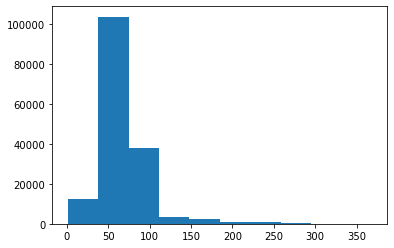

In [37]:
plt.hist(final_frog['ppt_mean'])
plt.show

the 75th percentile is 77.9. this means 75% of frogs are having a habitat with very low precipitation value.thus only a few habitats (25%) are having a high ppt value between 77.9 to 368

### soil_mean

<function matplotlib.pyplot.show(close=None, block=None)>

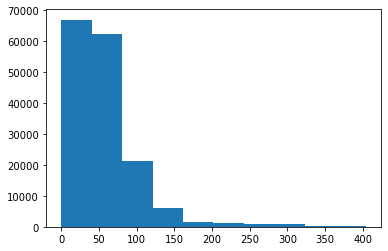

In [38]:
plt.hist(final_frog['soil_mean'])
plt.show

the 50th percentile is 47.4. means 50% of frogs or less are living in an habitat with a very low soil temperature. 

additionally, 75th percentile is 69.06. thus 75% of frogs are having an habitat with a low soil temperature. 25% of frogs are living in a habitat with higher soil moisture 

### tmax_mean

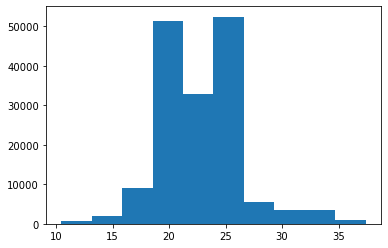

In [39]:
plt.hist(final_frog['tmax_mean'])
plt.show()

In [40]:
len(final_frog[(final_frog['tmax_mean'] >= 20.305002) & (final_frog['tmax_mean'] <= 24.218334)])

81954

81954 frogs are in habitats with temperatures within 25%(20.305002) and 75th(24.218334) 

In [41]:
#finding the percentage of the number of frogs within 25% to 75th% 
81954 / 193791 * 100

42.289889623357126

the figure shows a normal distribution with a mean of 22.69 and a 50th percentile of 22.77. from the flow of the distribution it can be said that the tmax temperatures across the habitats are normal.thus cool temperatures

50% of frogs are a living in habitat with a relatively high temperature values. with the other 50% or more having an habitat with a relatively low temperature values. 

75% of frogs are in habitats with high tmax temperatures and 25% are in habitat with very high temperatures between 24.2 to 37.4

In [42]:
final_frog[final_frog['tmax_mean'] > 24.218334]['eventDate'].value_counts()[:20]

2020-11-06    124
1995-01-06    120
2018-10-16    115
2020-11-07     98
2018-10-20     98
2020-11-09     97
2018-11-15     97
2018-10-14     97
2018-10-21     96
2020-02-09     90
2020-03-11     89
2018-10-15     88
2019-11-08     85
2020-09-25     79
2018-10-17     78
2018-11-11     76
2020-10-30     75
2019-09-19     73
2020-09-02     72
2020-11-08     72
Name: eventDate, dtype: int64

In [43]:
#finding the frog species on the eventdate date recorded the most values above the 75%
final_frog[(final_frog['eventDate'] == '2020-11-06') & (final_frog['tmax_mean'] > 24.218334)]['species'].value_counts()

Litoria Fallax        66
Crinia Glauerti       42
Crinia Signifera      14
Ranoidea Australis     2
Name: species, dtype: int64

66 Litoria Fallax were recorded on date with most values above 75%

In [44]:
#finding the state province that recorded the most values on the said event date above the 75%
final_frog[(final_frog['eventDate'] == '2020-11-06') & (final_frog['tmax_mean'] > 24.218334)]['stateProvince'].value_counts()

Queensland            44
Western Australia     42
New South Wales       36
Northern Territory     2
Name: stateProvince, dtype: int64

Queensland province recorded 44 Litoria Fallax species on the said date above 75%

### tmin_mean

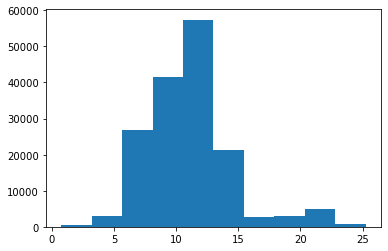

In [45]:
plt.hist(final_frog['tmin_mean'])
plt.show()


In [46]:
len(final_frog[(final_frog['tmin_mean'] >= 8.675002) & (final_frog['tmin_mean'] <= 12.721667)])

85368

85368 frogs live in habitats having between 25% to 75%

In [47]:
#finding the percentage of  85368 frogs 
85368 / 193791 * 100

44.05158134278682

50 percentile is 11.24. 50 percent of the minimum temperature mean of frogs habitats are low. thus from the the flow of distruibution on the left,relatively half or less habitats have low min_temp mean

also 50% and more of habitats have relative high min temperatures.at 75% percentile, 75% of forgs have habitats with high min_temperatures and 25% having higher values gearing from 12.7 to 25.25



It therefore can be said that, from the tmax_mean and tmin_mean, most frogs are in habibtats having condusive temperatures which are relatively low and high temperatures and vice versa.

In [48]:
final_frog['tmin_mean'].mode() 


0    12.721667
dtype: float64

the mode is the same as the mean at the 75th percentile of tmin_temperatures. thus 75% ,they were average and  most occuring values recorede

In [49]:
#finding the frogs at the 75th percentile
len(final_frog[final_frog['tmin_mean'] == 12.721667]) 

16484

In [50]:
#percentage of the frogs occuring most in habitats with average min temperatures
16484 / 193791 * 100

8.506070973368217

 8.5% of frogs(i.e 16484) were found in habitats with most occuring and average minimum temperatures. 

In [51]:
#finding frog species and their numbers at which they appear most with average minimum temperatures
tmin_75mode_spces =final_frog[final_frog['tmin_mean'] == 12.721667]['species']

In [52]:

tmin_75mode_spces.value_counts()

Litoria Fallax      10736
Crinia Signifera     5748
Name: species, dtype: int64

10736 Litoria Fallax and 5748 Crinia Signifera are the frog species that appeared most in habitats with average min temperatures

In [53]:
#finding the state or habitat they were found
tmin_75mode_state = final_frog[final_frog['tmin_mean'] == 12.721667]['stateProvince']

In [54]:
tmin_75mode_state.value_counts()

New South Wales    16483
Name: stateProvince, dtype: int64

Litoria Fallax and Crinia Signifera are the frog species that appeared most with average min temperatures and were found at New South Wales 

In [55]:
#finding the events were most recordings were made
final_frog[final_frog['tmin_mean'] == 12.721667]['eventDate'].value_counts()[:20]

2010-12-17    1708
2010-11-01     891
2010-12-18     799
2010-12-01     742
2010-11-05     669
2011-02-26     420
2011-02-25     345
2009-02-24     311
2010-11-04     299
2009-11-21     296
2008-12-16     286
2009-12-12     249
2009-11-22     245
2010-12-15     244
2009-12-13     185
2011-02-23     127
2011-02-24     121
2008-12-15     102
2008-11-25      75
2010-11-02      74
Name: eventDate, dtype: int64

In 2010-12-17, 1708 frogs were recorded having the most occurance and average min temperature

In [56]:
#finding the species that were recorded at the highest eventdate
final_frog[(final_frog['eventDate'] =='2010-12-17') & (final_frog['tmin_mean'] == 12.721667)]['species'].value_counts()

Litoria Fallax      1704
Crinia Signifera       4
Name: species, dtype: int64

out of the 1708 frogs, 1704 Litoria Fallax frog species were recorded and 4 Crinia Signifera frog species were recorded in New South Wales

In [57]:
#trying to assign a different code to confirm the results above
final_frog[(final_frog['eventDate'] =='2010-12-17') & (final_frog['species'] !='Litoria Fallax') & (final_frog['tmin_mean'] == 12.721667)]['species']

97562     Crinia Signifera
133000    Crinia Signifera
165886    Crinia Signifera
192881    Crinia Signifera
Name: species, dtype: object

## MULTIVARIATE ANALYSIS

In [58]:
final_frog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193791 non-null  int64         
 1   eventDate         185026 non-null  datetime64[ns]
 2   country           193791 non-null  object        
 3   continent         193791 non-null  object        
 4   stateProvince     193099 non-null  object        
 5   decimalLatitude   193791 non-null  float64       
 6   decimalLongitude  193791 non-null  float64       
 7   species           193791 non-null  object        
 8   occurrenceStatus  193791 non-null  int64         
 9   key               193791 non-null  int64         
 10  ppt_mean          161812 non-null  float64       
 11  soil_mean         161812 non-null  float64       
 12  tmax_mean         161812 non-null  float64       
 13  tmin_mean         161812 non-null  float64       
 14  mont

### year against tmax and tmin

In [59]:
final_frog.head(2)

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336,1.0,2020.0
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668,3.0,2010.0


In [67]:
#filling the null values in the year with 0
final_frog['year'] = final_frog['year'].fillna(0)

In [68]:
#assgning year values into an integer
final_frog['year'] = final_frog.year.astype(int) 

In [69]:
final_frog

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336,1.0,2020
1,3457021422,2010-03-14 22:23:00,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668,3.0,2010
2,1571195309,2014-04-11 19:51:57,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004,4.0,2014
3,2265778539,2018-07-21 21:24:21,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670,7.0,2018
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668,10.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaT,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667,NaN,0
193787,1319899134,1937-04-01 00:00:00,Panama,Central America,PanamÃ¡,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667,4.0,1937
193788,1318901755,1937-04-05 00:00:00,Panama,Central America,PanamÃ¡,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667,4.0,1937
193789,1322299951,2002-07-09 00:00:00,Honduras,Central America,Gracias a Dios,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335,7.0,2002


In [70]:
final_frog.shape

(193791, 16)

### Year vs Temperatures

In [119]:
year_vs_tem = final_frog.groupby('year')['tmax_mean','tmin_mean'].mean().reset_index()

C:\Users\Vault\AppData\Local\Temp/ipykernel_6924/4099150497.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_vs_tem = final_frog.groupby('year')['tmax_mean','tmin_mean'].mean().reset_index()


In [120]:
year_vs_tem

,year,tmax_mean,tmin_mean
0,0,19.506332,9.750394
1,1754,0.000000,0.000000
2,1770,20.254651,12.059563
3,1788,19.638334,12.323335
4,1808,23.180004,8.920001
...,...,...,...
138,2018,18.703264,9.232522
139,2019,17.217060,8.482954
140,2020,17.279968,8.289896
141,2021,19.634738,10.665254


In [110]:
final_frog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   gbifID            193791 non-null  int64         
 1   eventDate         185026 non-null  datetime64[ns]
 2   country           193791 non-null  object        
 3   continent         193791 non-null  object        
 4   stateProvince     193099 non-null  object        
 5   decimalLatitude   193791 non-null  float64       
 6   decimalLongitude  193791 non-null  float64       
 7   species           193791 non-null  object        
 8   occurrenceStatus  193791 non-null  int64         
 9   key               193791 non-null  int64         
 10  ppt_mean          161812 non-null  float64       
 11  soil_mean         161812 non-null  float64       
 12  tmax_mean         161812 non-null  float64       
 13  tmin_mean         161812 non-null  float64       
 14  mont

In [113]:
#filling the null values 
final_frog['tmax_mean'] = final_frog['tmax_mean'].fillna(0)
final_frog['eventDate'] = final_frog['eventDate'].fillna(0)
final_frog['month'] = final_frog['month'].fillna(0)

In [115]:
final_frog['ppt_mean'] = final_frog['ppt_mean'].fillna(0)
final_frog['soil_mean'] = final_frog['soil_mean'].fillna(0)
final_frog['tmin_mean'] = final_frog['tmin_mean'].fillna(0)

In [117]:
final_frog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193791 non-null  int64  
 1   eventDate         193791 non-null  object 
 2   country           193791 non-null  object 
 3   continent         193791 non-null  object 
 4   stateProvince     193099 non-null  object 
 5   decimalLatitude   193791 non-null  float64
 6   decimalLongitude  193791 non-null  float64
 7   species           193791 non-null  object 
 8   occurrenceStatus  193791 non-null  int64  
 9   key               193791 non-null  int64  
 10  ppt_mean          193791 non-null  float64
 11  soil_mean         193791 non-null  float64
 12  tmax_mean         193791 non-null  float64
 13  tmin_mean         193791 non-null  float64
 14  month             193791 non-null  float64
 15  year              193791 non-null  int32  
dtypes: float64(7), int32

In [124]:
year_vs_tem['year'].unique()

array([   0, 1754, 1770, 1788, 1808, 1852, 1860, 1861, 1869, 1871, 1872,
       1877, 1880, 1883, 1885, 1888, 1889, 1892, 1893, 1894, 1896, 1897,
       1900, 1901, 1902, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

### year vs tmax

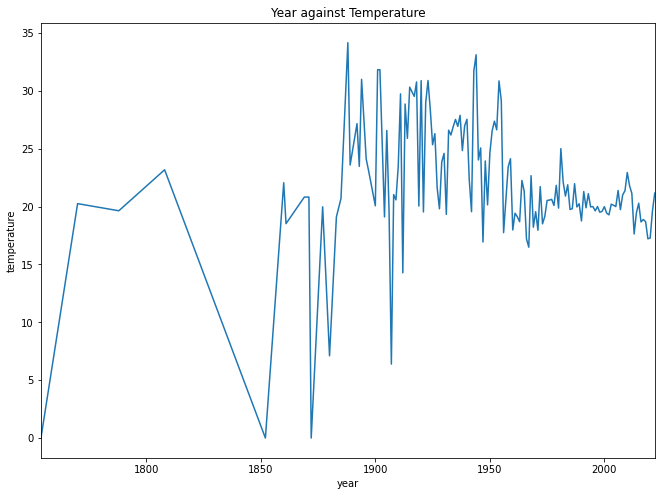

In [130]:
plt.figure(figsize = (11,8))
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Year against Temperature')
plt.xlim(1754, 2022)
plt.plot(year_vs_tem['year'], year_vs_tem['tmax_mean'])

from the graph, from 1850 to 1910 there has been a rise and fall of temperatures.
Also temperatures went up from 1910 to 2022

### year vs tmin

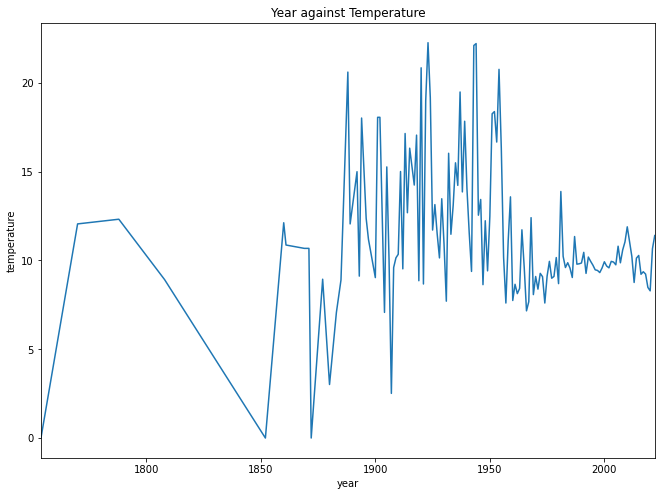

In [131]:
plt.figure(figsize = (11,8))
plt.xlabel('year')
plt.ylabel('temperature')
plt.title('Year against Temperature')
plt.xlim(1754, 2022)
plt.plot(year_vs_tem['year'], year_vs_tem['tmin_mean'])

from the graph, from 1850 to 1910 there has been a rise and fall of temperatures. Also temperatures went up from 1910 to 2022

from year against tmax_mean and tmin_mean, the graph shows similarities in their temperature distributions through the years

#### continents against species

In [136]:
final_frog.groupby('continent')['species'].value_counts()

continent        species                  
Africa           Xenopus Laevis                 1138
                 Chiromantis Xerampelina         702
Australia        Crinia Signifera             126657
                 Litoria Fallax                47332
                 Crinia Glauerti                9393
                 Ranoidea Australis             4097
                 Austrochaperina Pluvialis       541
Central America  Agalychnis Callidryas          2212
                 Dendrobates Auratus            1718
                 Xenopus Laevis                    1
Name: species, dtype: int64

In [139]:
Australia = final_frog[final_frog['continent'] == 'Australia']

In [151]:
 Australia.groupby('species')['species'].count()


species
Austrochaperina Pluvialis       541
Crinia Glauerti                9393
Crinia Signifera             126657
Litoria Fallax                47332
Ranoidea Australis             4097
Name: species, dtype: int64

<AxesSubplot:title={'center':'Species in Australia'}, ylabel='species'>

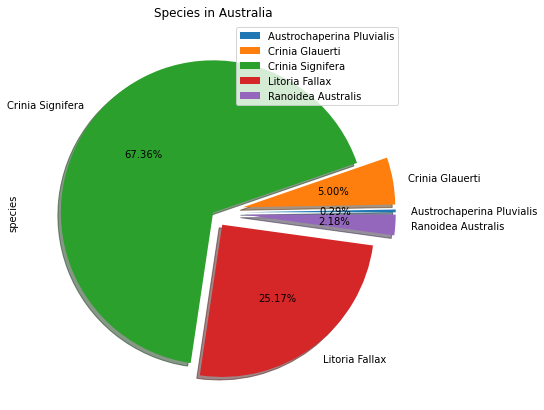

In [195]:
Australia.groupby('species')['species'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (7,7), title = 'Species in Australia', shadow = True ,legend = True ,explode = (0.2, 0.2, 0, 0.1, 0.2))

from the pie chart, 67.36% of frogs species recorded were Crinia Signifera. the least recorded were Austrochaperina Pluvialis which were 0.29%

In [204]:
#assigning the continent of africa to africa_spc
Africa_spc = final_frog[final_frog['continent'] == 'Africa']

In [211]:
Africa_spc.groupby('species')['species'].count()

species
Chiromantis Xerampelina     702
Xenopus Laevis             1138
Name: species, dtype: int64

<AxesSubplot:title={'center':'Species found in African'}, ylabel='species'>

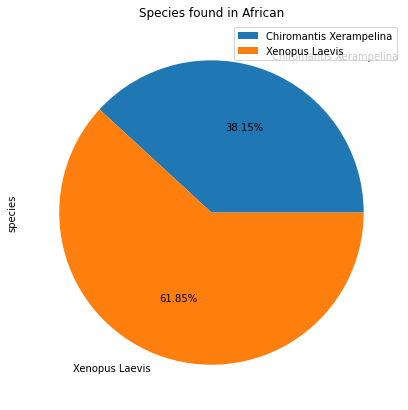

In [206]:
Africa_spc.groupby('species')['species'].count().plot(kind = 'pie', figsize = (7,7), autopct = '%1.2f%%', legend = True, title = 'Species found in African')

 from the piechart, 1840 frog species found in Africa, 1138 which is 61.85% were Xenopus Laevis and 702(38.15%) were Chiromantis Xerampelina

In [225]:
final_frog[(final_frog['continent'] == 'Africa') & (final_frog['tmax_mean'] >= 21.410006) & (final_frog['tmax_mean'] <= 37.401672) & (final_frog['species'] == 'Xenopus Laevis')]['species'].value_counts()

Xenopus Laevis    1000
Name: species, dtype: int64

out 1138 Xenopus Laevis species found in Africa, 1000 of them were recoreded in habitats with high temperatures between 21.4  to 37.4 

It can be that 138 Xenopus species were living in relatively low high temperatures.


In [226]:
final_frog[(final_frog['continent'] == 'Africa') & (final_frog['tmax_mean'] >= 21.410006) & (final_frog['tmax_mean'] <= 37.401672) & (final_frog['species'] != 'Xenopus Laevis')]['species'].value_counts()

Chiromantis Xerampelina    701
Name: species, dtype: int64

Again, out of 702 Chiromantis Xerampelina species, 701 were recorded living in high temperatures between 21.4 to 37.4

it can be concluded that only 1 Chiromantis Xerampelina was found in relatively low high temperatures

In [216]:
final_frog[['ppt_mean','soil_mean', 'tmax_mean', 'tmin_mean']].describe()

,ppt_mean,soil_mean,tmax_mean,tmin_mean
count,193791.000000,193791.000000,193791.000000,193791.000000
mean,56.939973,46.361396,18.952843,9.319072
std,38.302977,50.046418,9.003989,5.209191
min,0.000000,0.000000,0.000000,0.000000
25%,42.033333,10.333333,18.991669,7.218336
50%,58.666668,37.550000,21.410006,10.106669
75%,72.133330,63.100000,24.218334,12.721667
max,368.750000,403.716670,37.401672,25.253334


In [227]:
Cent_A = final_frog[final_frog['continent']== 'Central America']


In [241]:
Cent_A.groupby('species')['species'].count()

species
Agalychnis Callidryas    2212
Dendrobates Auratus      1718
Xenopus Laevis              1
Name: species, dtype: int64

<AxesSubplot:title={'center':'Species in Central America'}, xlabel='species', ylabel='number of recorded species'>

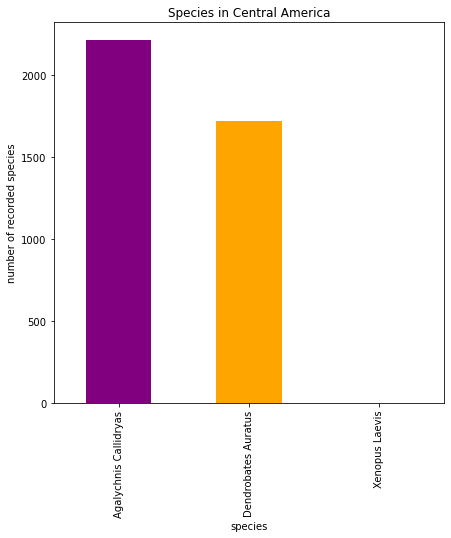

In [258]:
Cent_A.groupby('species')['species'].count().plot(kind = 'bar', title = 'Species in Central America', figsize =(7,7), color = ['Purple', 'Orange', 'Blue'], ylabel= 'number of recorded species' )

In [260]:
Callidryas =   2212 / 3139 * 100
Auratus    =  1718 /  3139 * 100
Laevis     =   1  /   3139 * 100

print(str(Callidryas))
print(str(Auratus))
print(str(Laevis)) 

70.4683020070086
54.73080598916853
0.03185727938834024


from the bar gragh, 70.46% of Agalychnis Callidryas frog species were recorded and only 1(thus 0.031%) of Xenopus Laevis was recorded

In [262]:
#finding the country and date this species was recorded
final_frog[(final_frog['continent'] == 'Central America') & (final_frog['species'] == 'Xenopus Laevis') & (final_frog['country']) & (final_frog['eventDate'])]

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
85069,3112927581,2021-05-02 15:30:00,Mexico,Central America,MÃ©xico,19.650511,-99.221738,Xenopus Laevis,0,85069,74.95,27.583334,23.161669,6.651668,5.0,2021


The Xenopus Laevis frog species was recorded in Mexico on the 2021-05-02 at 15:30. and it was the only species of its kind recorded in Central America

occurrence status against continents

In [341]:
 final_frog['occurrenceStatus'].value_counts()


0    146459
1     47332
Name: occurrenceStatus, dtype: int64

In [292]:
final_frog.groupby('occurrenceStatus')['species'].value_counts()

occurrenceStatus  species                  
0                 Crinia Signifera             126657
                  Crinia Glauerti                9393
                  Ranoidea Australis             4097
                  Agalychnis Callidryas          2212
                  Dendrobates Auratus            1718
                  Xenopus Laevis                 1139
                  Chiromantis Xerampelina         702
                  Austrochaperina Pluvialis       541
1                 Litoria Fallax                47332
Name: species, dtype: int64

<AxesSubplot:title={'center':'Occurrence of Species'}, xlabel='occurrenceStatus,species', ylabel='number of recorded species'>

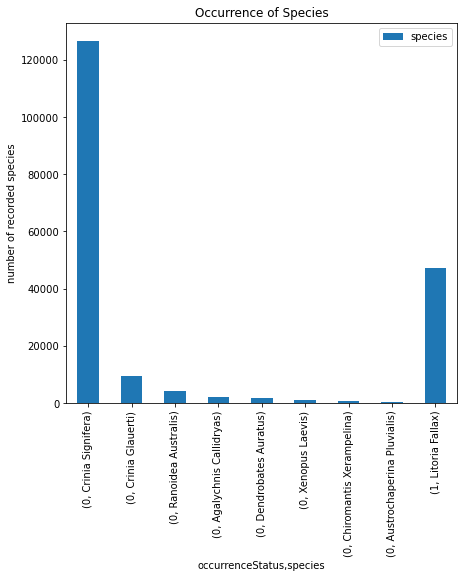

In [355]:
final_frog.groupby('occurrenceStatus')['species'].value_counts().plot(kind = 'bar', title = 'Occurrence of Species', figsize =(7,7), ylabel= 'number of recorded species', legend = True)

the bar shows the recording of species occurances

In [296]:
final_frog.groupby(['occurrenceStatus','continent'])['species'].value_counts()

occurrenceStatus  continent        species                  
0                 Africa           Xenopus Laevis                 1138
                                   Chiromantis Xerampelina         702
                  Australia        Crinia Signifera             126657
                                   Crinia Glauerti                9393
                                   Ranoidea Australis             4097
                                   Austrochaperina Pluvialis       541
                  Central America  Agalychnis Callidryas          2212
                                   Dendrobates Auratus            1718
                                   Xenopus Laevis                    1
1                 Australia        Litoria Fallax                47332
Name: species, dtype: int64

the count shows the frog species were only recorded in Australia

In [335]:
final_frog.groupby([(final_frog['occurrenceStatus'] == 1),(final_frog['country'] == 'Australia')])['species'].value_counts()

occurrenceStatus  country  species                  
False             False    Agalychnis Callidryas          2212
                           Dendrobates Auratus            1718
                           Xenopus Laevis                 1139
                           Chiromantis Xerampelina         702
                  True     Crinia Signifera             126657
                           Crinia Glauerti                9393
                           Ranoidea Australis             4097
                           Austrochaperina Pluvialis       541
True              True     Litoria Fallax                47332
Name: species, dtype: int64

In [306]:
final_frog[(final_frog['occurrenceStatus'] == 1) & (final_frog['country'] == 'Australia') & (final_frog['species'])]

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.000000,118.716670,23.830004,13.908336,1.0,2020
4,3407962690,2021-10-29 13:57:00,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax,1,4,84.800000,111.616670,25.933338,13.801668,10.0,2021
7,1944370584,2018-04-18 19:05:00,Australia,Australia,New South Wales,-33.693144,151.320884,Litoria Fallax,1,7,0.000000,0.000000,0.000000,0.000000,4.0,2018
8,1500319380,2009-07-28 17:16:00,Australia,Australia,Queensland,-27.888019,153.309342,Litoria Fallax,1,8,93.933334,91.800000,25.976667,14.755002,7.0,2009
17,2423011701,2019-08-28 09:24:00,Australia,Australia,New South Wales,-33.925746,151.164082,Litoria Fallax,1,17,64.600000,47.416668,24.218334,12.721667,8.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193637,476613369,1970-11-27 00:00:00,Australia,Australia,New South Wales,-33.790001,151.000000,Litoria Fallax,1,193637,67.650000,43.233334,24.130001,12.366668,11.0,1970
193644,476613475,1970-11-27 00:00:00,Australia,Australia,New South Wales,-33.790001,151.000000,Litoria Fallax,1,193644,67.650000,43.233334,24.130001,12.366668,11.0,1970
193656,476614185,1970-10-25 00:00:00,Australia,Australia,New South Wales,-34.040001,150.860001,Litoria Fallax,1,193656,77.900000,72.850000,22.960003,11.935002,10.0,1970
193662,476614295,1970-10-25 00:00:00,Australia,Australia,New South Wales,-34.040001,150.690002,Litoria Fallax,1,193662,77.900000,72.850000,22.960003,11.935002,10.0,1970


In [353]:
#finding the count of stateprovince with the occurrence of 1 (thus containing, Litoria Fallax) of within the country Australia
oc_Prov = final_frog[(final_frog['occurrenceStatus'] == 1) & (final_frog['country'] == 'Australia') & (final_frog['species'])]

In [354]:
oc_Prov.groupby('stateProvince')['stateProvince'].count()

stateProvince
Australian Capital Territory        6
New South Wales                 35989
Northern Territory                  1
Queensland                      11074
Victoria                          261
Name: stateProvince, dtype: int64

New South Wales Province recorded the most Litoria Fallax frog species of 35989. Northern Territory Province recorded the least of 1. 

<AxesSubplot:title={'center':'Litoria Fallax species in Australia'}, ylabel='number of recorded species'>

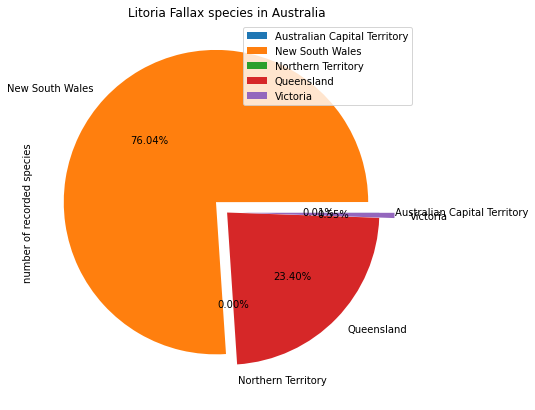

In [362]:
oc_Prov.groupby('stateProvince')['stateProvince'].count().plot(kind = 'pie', title ='Litoria Fallax species in Australia', autopct = '%1.2f%%', figsize =(7,7), legend = True, xlabel = 'stateProvince', ylabel = 'number of recorded species', explode = (0, 0.1, 0, 0, 0.1))

from the pie chart, 76.04% of Litoria Fallax were recorded in new south wales. 

In [396]:

e_s = final_frog[(final_frog['occurrenceStatus'] == 1) & (final_frog['country'] == 'Australia') & (final_frog['species']) & (final_frog['stateProvince'] == 'New South Wales')]
e_s

,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,month,year
0,2574007008,2020-01-23 01:38:00,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.716670,23.830004,13.908336,1.0,2020
7,1944370584,2018-04-18 19:05:00,Australia,Australia,New South Wales,-33.693144,151.320884,Litoria Fallax,1,7,0.00000,0.000000,0.000000,0.000000,4.0,2018
17,2423011701,2019-08-28 09:24:00,Australia,Australia,New South Wales,-33.925746,151.164082,Litoria Fallax,1,17,64.60000,47.416668,24.218334,12.721667,8.0,2019
21,2236299662,2018-02-13 23:02:00,Australia,Australia,New South Wales,-31.732415,152.088515,Litoria Fallax,1,21,91.60000,95.583336,23.356667,10.981668,2.0,2018
23,2563750401,2017-10-25 21:07:00,Australia,Australia,New South Wales,-32.968624,151.644194,Litoria Fallax,1,23,72.13333,61.533333,23.651667,12.553335,10.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193628,476613473,1970-11-27 00:00:00,Australia,Australia,New South Wales,-33.790001,151.000000,Litoria Fallax,1,193628,67.65000,43.233334,24.130001,12.366668,11.0,1970
193637,476613369,1970-11-27 00:00:00,Australia,Australia,New South Wales,-33.790001,151.000000,Litoria Fallax,1,193637,67.65000,43.233334,24.130001,12.366668,11.0,1970
193644,476613475,1970-11-27 00:00:00,Australia,Australia,New South Wales,-33.790001,151.000000,Litoria Fallax,1,193644,67.65000,43.233334,24.130001,12.366668,11.0,1970
193656,476614185,1970-10-25 00:00:00,Australia,Australia,New South Wales,-34.040001,150.860001,Litoria Fallax,1,193656,77.90000,72.850000,22.960003,11.935002,10.0,1970


In [ ]:
#finding the eventdates that recorded the most values in the Newsouth Wales Province